## Importing Libraries

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [121]:
airbnb=pd.read_csv(r"D:\Jupyter Files\My freelancing project\3 models on data (usama)\singapore\New folder\singapoer_listings.csv")

#### Print the Shape of the dataset

In [122]:
airbnb.shape

(17133, 16)

#### Print the Datatypes of the dataset

In [123]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [124]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17133 entries, 0 to 17132
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17133 non-null  int64  
 1   name                            17127 non-null  object 
 2   host_id                         17133 non-null  int64  
 3   host_name                       17133 non-null  object 
 4   neighbourhood_group             17133 non-null  object 
 5   neighbourhood                   17133 non-null  object 
 6   latitude                        17133 non-null  float64
 7   longitude                       17133 non-null  float64
 8   room_type                       17133 non-null  object 
 9   price                           17133 non-null  int64  
 10  minimum_nights                  17133 non-null  int64  
 11  number_of_reviews               17133 non-null  int64  
 12  last_review                     

#### Removing the Duplicates if any

In [125]:
#airbnb.duplicated().sum()
#airbnb.drop_duplicates(inplace=True)

#### Check for the null values in each column

In [126]:
airbnb.isnull().sum()

id                                   0
name                                 6
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4968
reviews_per_month                 4968
calculated_host_listings_count       0
availability_365                     0
dtype: int64

#### Drop unnecessary columns

In [127]:
#name id host name and last review are not significant hence dropping them for simplicity
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

### Examining Changes

In [129]:
airbnb.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,266763,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,0.01,2,365
1,227796,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,0.28,1,365
2,266763,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,0.20,2,365
3,367042,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,0.15,9,353
4,367042,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,0.22,9,355


#### Rreplace the 'reviews per month' by zero

In [130]:
#replace nan by 0 in reviews per month
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

#### Remove the NaN values from the dataset

In [131]:
airbnb.isnull().sum()
airbnb.dropna(how='any',inplace=True)
airbnb.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17133 entries, 0 to 17132
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         17133 non-null  int64  
 1   neighbourhood_group             17133 non-null  object 
 2   neighbourhood                   17133 non-null  object 
 3   latitude                        17133 non-null  float64
 4   longitude                       17133 non-null  float64
 5   room_type                       17133 non-null  object 
 6   price                           17133 non-null  int64  
 7   minimum_nights                  17133 non-null  int64  
 8   number_of_reviews               17133 non-null  int64  
 9   reviews_per_month               17133 non-null  float64
 10  calculated_host_listings_count  17133 non-null  int64  
 11  availability_365                17133 non-null  int64  
dtypes: float64(3), int64(6), object(

### Examine Continous Variables

In [132]:
#this function provides statistical results fro individual column like total count mean standard deviation

airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.713300e+04,17133.000000,17133.000000,17133.000000,17133.000000,17133.000000,17133.000000,17133.000000,17133.000000
mean,7.124002e+07,1.315789,103.848365,159.766708,19.370396,17.362400,0.664219,31.346232,199.988443
std,6.949509e+07,0.031795,0.046277,353.192710,46.347907,35.310007,1.107749,56.308355,149.843623
min,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.627104e+07,1.296610,103.835050,60.000000,1.000000,0.000000,0.000000,1.000000,36.000000
50%,4.504868e+07,1.311370,103.849070,110.000000,3.000000,3.000000,0.170000,6.000000,240.000000
75%,1.093331e+08,1.323800,103.876080,181.000000,10.000000,17.000000,0.810000,30.000000,355.000000
max,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


### Print all the columns names

In [133]:
airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

### Get Correlation between different variables

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

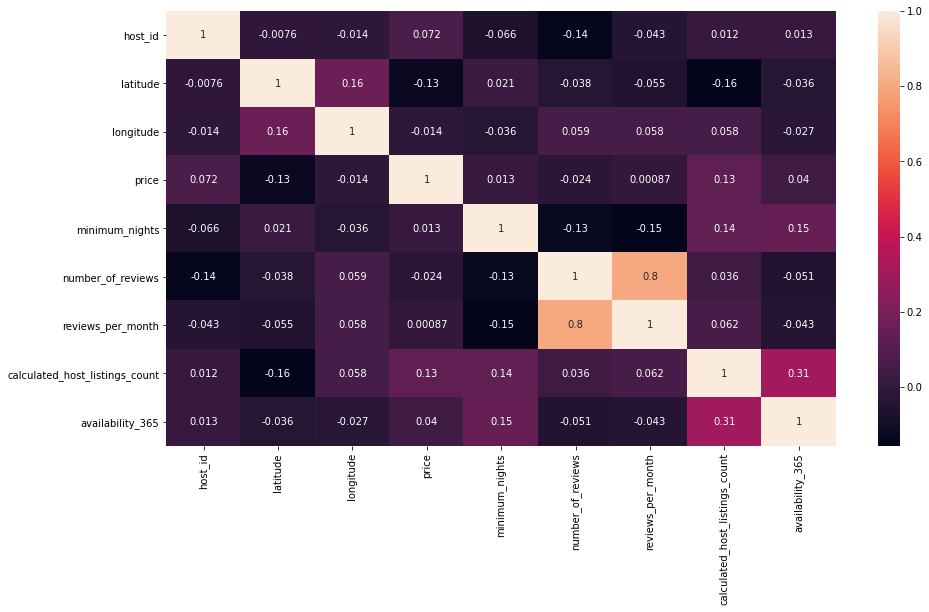

In [134]:
corr = airbnb.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
airbnb.columns

In [135]:
airbnb.shape

(17133, 12)

In [136]:
airbnb.head(15)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,266763,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,0.01,2,365
1,227796,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,0.28,1,365
2,266763,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,0.20,2,365
3,367042,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,0.15,9,353
4,367042,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,0.22,9,355
5,367042,East Region,Tampines,1.34702,103.96103,Private room,104,1,39,0.38,9,346
6,367042,East Region,Tampines,1.34348,103.96337,Private room,208,1,25,0.25,9,172
7,1017645,East Region,Bedok,1.32304,103.91363,Private room,50,90,174,1.88,4,59
8,1017645,East Region,Bedok,1.32458,103.91163,Private room,54,90,198,2.08,4,133
9,1017645,East Region,Bedok,1.32461,103.91191,Private room,42,90,236,2.53,4,147


## Data Visualization

In [137]:
import seaborn as sns

In [138]:
airbnb['neighbourhood_group'].unique()

array(['North Region', 'Central Region', 'East Region', 'West Region',
       'North-East Region'], dtype=object)

### Plot all Neighbourhood Group

Text(0.5, 1.0, 'Neighbourhood Group')

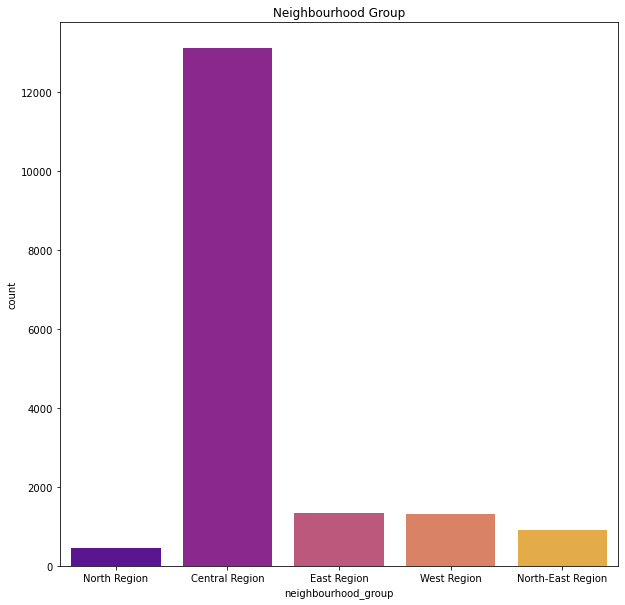

In [139]:
#count plot will plot unique values in neighbourhood_group against their counts
#plasma is a color range in sns can be changed to change the graph color

sns.countplot(airbnb['neighbourhood_group'],palette='plasma')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

### Neighbourhood

Text(0.5, 1.0, 'Neighbourhood')

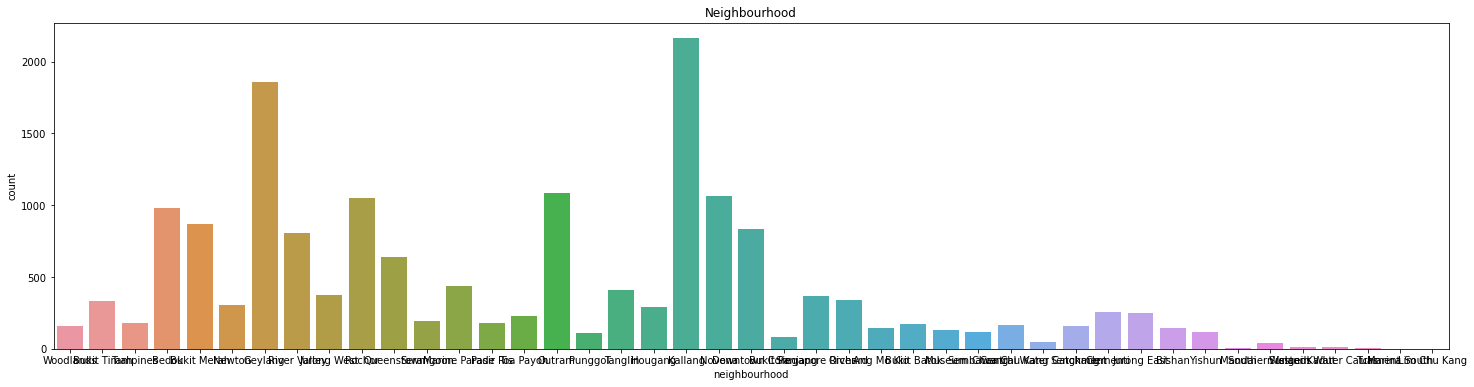

In [140]:
sns.countplot(airbnb['neighbourhood'])#, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

### Room Type

Text(0.5, 1.0, 'Restaurants delivering online or Not')

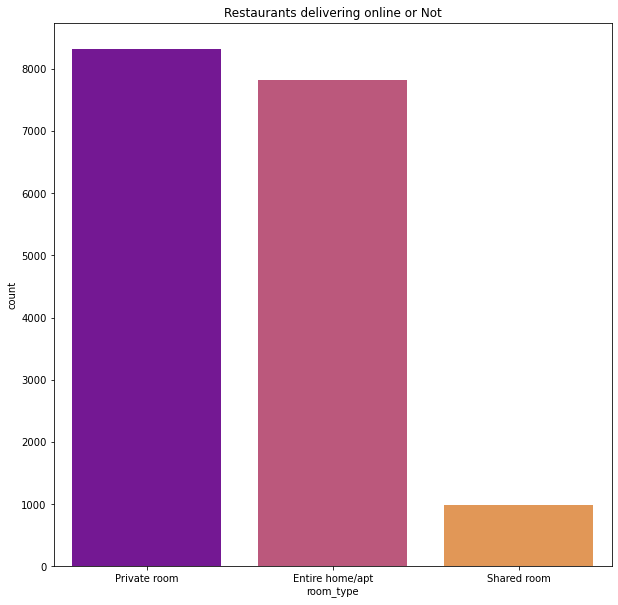

In [141]:
#Restaurants delivering Online or not
sns.countplot(airbnb['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

### Relation between neighbourgroup and Availability of Room

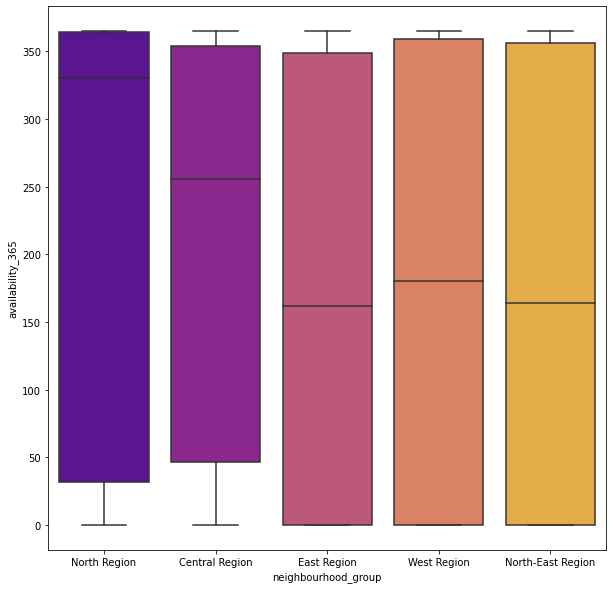

In [142]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')

## Map of Neighbourhood group

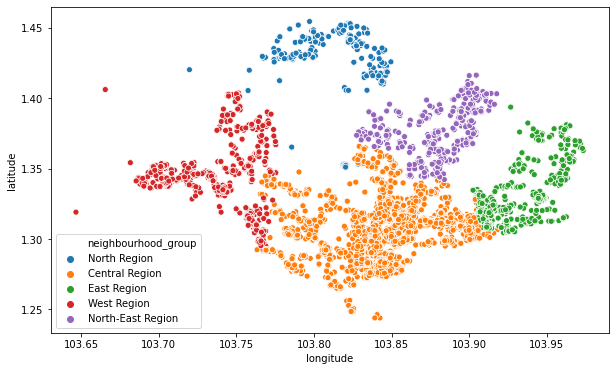

In [143]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)
plt.ioff()

## Map of Neighbourhood

plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood)
plt.ioff()

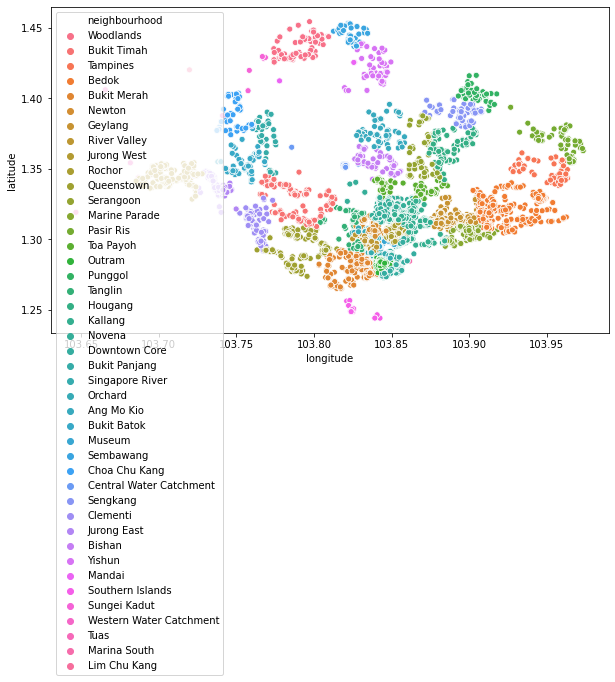

In [144]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood)
plt.ioff()

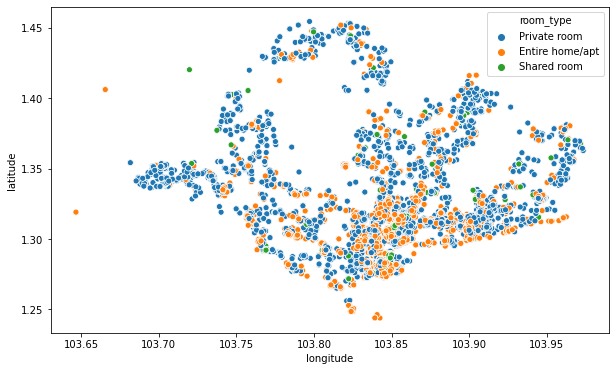

In [145]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.room_type)
plt.ioff()

## Availability of Room

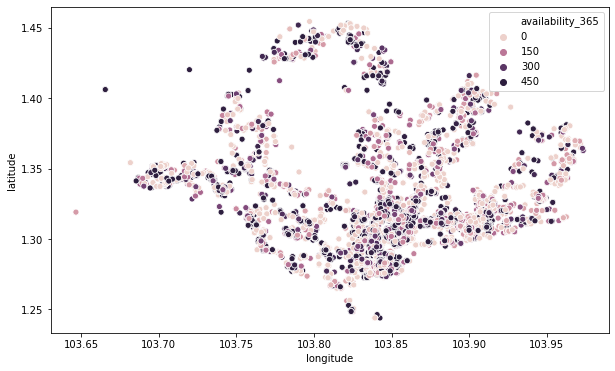

In [146]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365)
plt.ioff()

## Application of machine learning algorithm

### Drop Columns

In [152]:
#airbnb.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
#examing the changes

airbnb.shape

(17133, 6)

In [153]:
#encoding neighborhood and room type as they are strings
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())

In [154]:
#all numbers no string
airbnb_en

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,83,180,2,365
1,1,0,81,90,1,365
2,0,0,69,6,2,365
3,2,0,206,1,9,353
4,2,0,94,1,9,355
...,...,...,...,...,...,...
17128,2,0,99,3,21,343
17129,2,0,99,3,21,337
17130,1,1,115,2,27,338
17131,1,1,190,3,30,78


Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

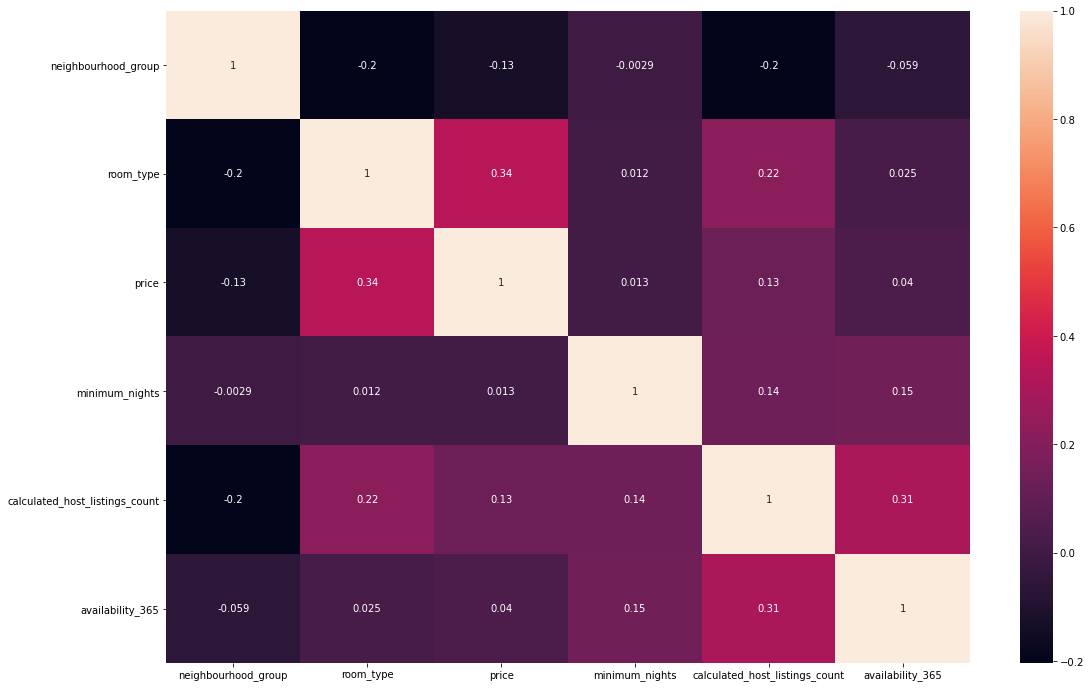

In [155]:
#Get Correlation between different variables
corr = airbnb_en.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)
airbnb_en.columns

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [248]:
#Defining the independent variables and dependent variables
x = airbnb_en.iloc[:,[0,1,3,4,5]]#every column except price
y = airbnb_en['price']#index 2 for price
#Getting Test and Training Set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
x_train.head()
y_train.head()



11872    210
6949      25
6014     706
897      208
12600    194
Name: price, dtype: int64

In [249]:
x_train.shape

(15419, 5)

# Linear Regression Model

In [250]:
#Prepare a Linear Regression Model

reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.04974905202805391

# Decision Tree Regression

In [251]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=95)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.2948124945145051

# Decision Tree Regression

In [252]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=96)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.6023183278576598

In [89]:
#the end